# Exploratory Data Analysis(EDA) on Honey Production Dataset
By
Name : Pari Khaitan
Enrollment No : 05501172021
Branch : CSE-AI

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
honey_production = pd.read_csv(r"E:\honeyproduction.csv")   #while using normal string for path, we use r

In [3]:
honey_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


This dataset has 8 columns, datatypes of these columns are as 1 is object (1 qualitative variable) , 2 is integer, and rest are float(7 quantitative variable). The dataset has 626 entries. Variable "year" has integer datatype and needs to be converted into category datatype since it is a categorical variable.

In [4]:
honey_production.year = honey_production.year.astype('category')

In [5]:
honey_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   state        626 non-null    object  
 1   numcol       626 non-null    float64 
 2   yieldpercol  626 non-null    int64   
 3   totalprod    626 non-null    float64 
 4   stocks       626 non-null    float64 
 5   priceperlb   626 non-null    float64 
 6   prodvalue    626 non-null    float64 
 7   year         626 non-null    category
dtypes: category(1), float64(5), int64(1), object(1)
memory usage: 35.6+ KB


All the variables has proper datatypes

# 1) Exploring Qualitative and Quantitaive Variables in the given dataset.

In [6]:
#Quantitative variables
honey_production.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07


In [7]:
#Qualitative variables
honey_production['state'].value_counts()

AL    15
SD    15
NJ    15
NM    15
NY    15
NC    15
ND    15
OH    15
OR    15
PA    15
TN    15
MT    15
TX    15
UT    15
VT    15
VA    15
WA    15
WV    15
WI    15
WY    15
AZ    15
NE    15
MO    15
IN    15
AR    15
CA    15
CO    15
FL    15
GA    15
HI    15
ID    15
IL    15
IA    15
KS    15
KY    15
LA    15
ME    15
MI    15
MN    15
MS    15
NV    11
OK     6
MD     6
SC     3
Name: state, dtype: int64

Observations:

1. Number of colonies in every state have a very huge range from 2000 to 510000.
2. The yield per colony also has a wide range from 19 pounds to 136 pounds.


# Qn2. Pairplots and correlation plots

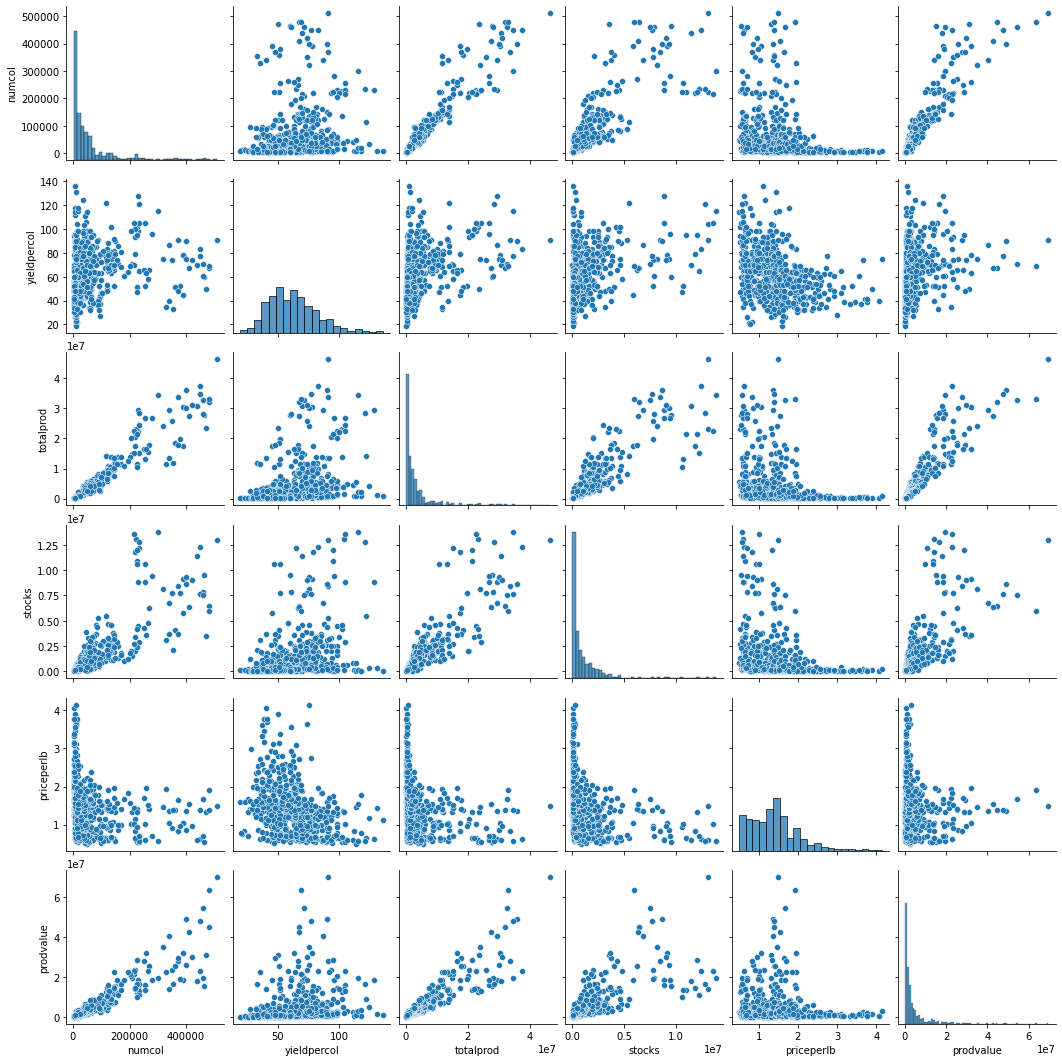

In [8]:
sns.pairplot(honey_production)

In [9]:
correlation = honey_production.corr()
correlation['priceperlb'].sort_values(ascending=False)

priceperlb     1.000000
prodvalue     -0.089567
numcol        -0.232701
totalprod     -0.264499
stocks        -0.305867
yieldpercol   -0.358646
Name: priceperlb, dtype: float64

In [10]:
#The 2D correlation plot
correlation_plot = honey_production.corr() 
correlation_plot

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
numcol,1.000000,0.243515,0.953594,0.825929,-0.232701,0.912796
yieldpercol,0.243515,1.000000,0.396252,0.367812,-0.358646,0.278977
totalprod,0.953594,0.396252,1.000000,0.878830,-0.264499,0.907236
stocks,0.825929,0.367812,0.878830,1.000000,-0.305867,0.728560
priceperlb,-0.232701,-0.358646,-0.264499,-0.305867,1.000000,-0.089567
prodvalue,0.912796,0.278977,0.907236,0.728560,-0.089567,1.000000


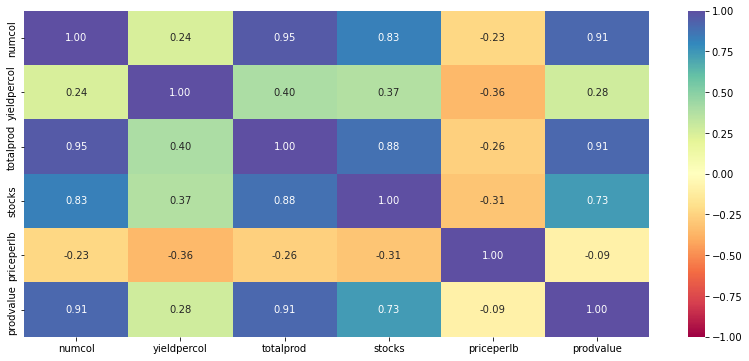

In [11]:
#Using heatmap
plt.figure(figsize=(14,6))
sns.heatmap(correlation_plot, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations:

Production and stocks value are correlated to number of colonies.
Yield per colony and priceperlb are not correlated with any of the features.

In [12]:
#The categorical variables(number of unique values)
print(honey_production.state.nunique())
print(honey_production.year.nunique())

44
15


Observation: For 15 years, honey production is done by 44 US States

# QN 3. Trend of honey production over the years

In [13]:
production_py = honey_production.groupby('year').totalprod.mean().reset_index()
print(production_py)

    year     totalprod
0   1998  5.105093e+06
1   1999  4.706674e+06
2   2000  5.106000e+06
3   2001  4.221545e+06
4   2002  3.892386e+06
5   2003  4.122091e+06
6   2004  4.456805e+06
7   2005  4.243146e+06
8   2006  3.761902e+06
9   2007  3.600512e+06
10  2008  3.974927e+06
11  2009  3.626700e+06
12  2010  4.382350e+06
13  2011  3.680025e+06
14  2012  3.522675e+06


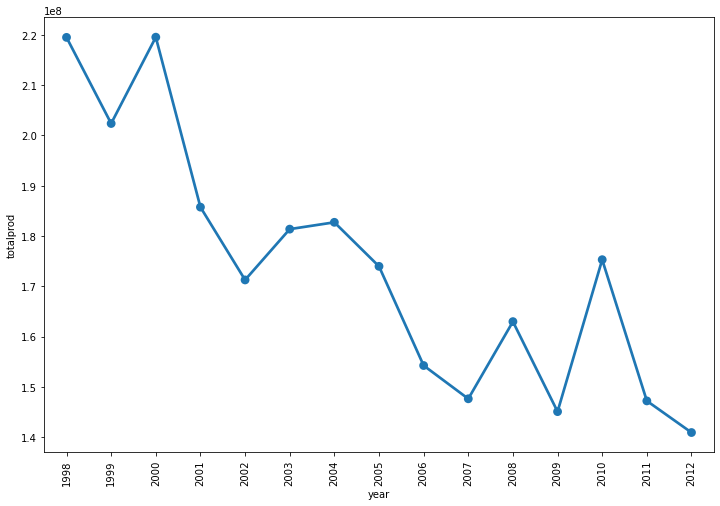

In [14]:
#trend over the years
plt.figure(figsize=(12,8))
sns.pointplot(x='year', y='totalprod', data=honey_production, estimator=sum, ci=None)
plt.xticks(rotation=90)
plt.show()

Observation: there has been a decline in the honey prduction

# 4

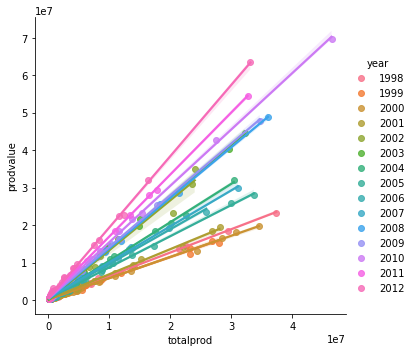

In [15]:
#production trend with years
sns.lmplot(x='totalprod' , y='prodvalue' , data=honey_production , hue='year')

Text(0, 0.5, 'Production value')

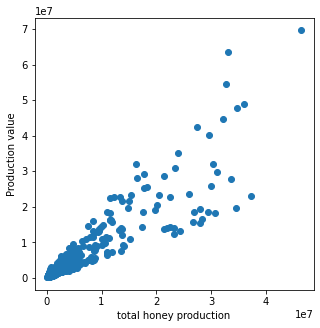

In [16]:
#production trend per year
plt.figure(figsize=(5,5))
plt.scatter(x='totalprod', y='prodvalue', data=honey_production)
plt.xlabel('total honey production')
plt.ylabel('Production value')

Observation
1. Production value by total production increases almost every year

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '1998'),
  Text(1, 0, '1999'),
  Text(2, 0, '2000'),
  Text(3, 0, '2001'),
  Text(4, 0, '2002'),
  Text(5, 0, '2003'),
  Text(6, 0, '2004'),
  Text(7, 0, '2005'),
  Text(8, 0, '2006'),
  Text(9, 0, '2007'),
  Text(10, 0, '2008'),
  Text(11, 0, '2009'),
  Text(12, 0, '2010'),
  Text(13, 0, '2011'),
  Text(14, 0, '2012')])

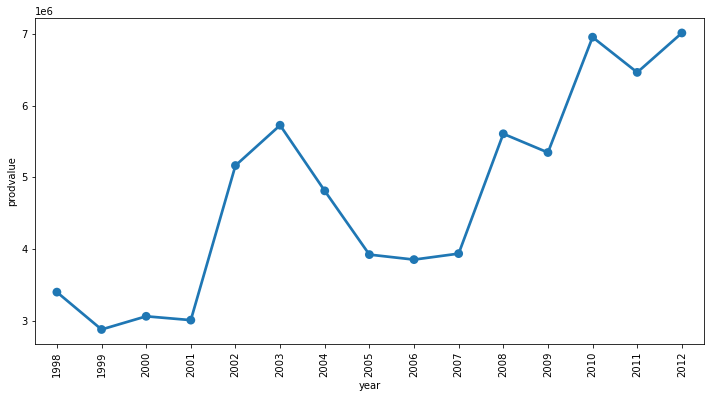

In [17]:
#analyzing change in value of production every year
plt.figure(figsize=(12,6))
sns.pointplot(x='year', y='prodvalue' , data=honey_production , ci=None)
plt.xticks(rotation=90)

Observations:

The value of production varied differntly, but overall it increased from 1998 to 2012, even though the total production value decreased over the years.


# 5 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '1998'),
  Text(1, 0, '1999'),
  Text(2, 0, '2000'),
  Text(3, 0, '2001'),
  Text(4, 0, '2002'),
  Text(5, 0, '2003'),
  Text(6, 0, '2004'),
  Text(7, 0, '2005'),
  Text(8, 0, '2006'),
  Text(9, 0, '2007'),
  Text(10, 0, '2008'),
  Text(11, 0, '2009'),
  Text(12, 0, '2010'),
  Text(13, 0, '2011'),
  Text(14, 0, '2012')])

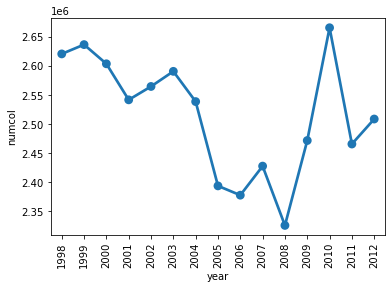

In [18]:
sns.pointplot(x='year', y='numcol', data=honey_production, ci=None, estimator=sum)
plt.xticks(rotation=90)

Observations: 
1. The number of colonies have decreased over the year. Max value was in 2010 and min value was in 2008

# 6

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '1998'),
  Text(1, 0, '1999'),
  Text(2, 0, '2000'),
  Text(3, 0, '2001'),
  Text(4, 0, '2002'),
  Text(5, 0, '2003'),
  Text(6, 0, '2004'),
  Text(7, 0, '2005'),
  Text(8, 0, '2006'),
  Text(9, 0, '2007'),
  Text(10, 0, '2008'),
  Text(11, 0, '2009'),
  Text(12, 0, '2010'),
  Text(13, 0, '2011'),
  Text(14, 0, '2012')])

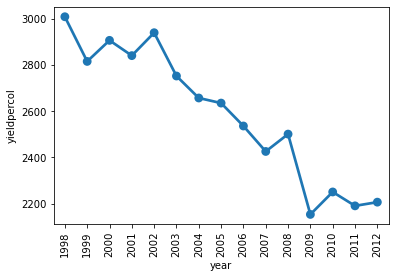

In [19]:
sns.pointplot(x='year', y='yieldpercol', data=honey_production, ci=None, estimator=sum)
plt.xticks(rotation=90) #variation of yield per colony over the years

Observation: 
Yield per colony decreased over the years

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '1998'),
  Text(1, 0, '1999'),
  Text(2, 0, '2000'),
  Text(3, 0, '2001'),
  Text(4, 0, '2002'),
  Text(5, 0, '2003'),
  Text(6, 0, '2004'),
  Text(7, 0, '2005'),
  Text(8, 0, '2006'),
  Text(9, 0, '2007'),
  Text(10, 0, '2008'),
  Text(11, 0, '2009'),
  Text(12, 0, '2010'),
  Text(13, 0, '2011'),
  Text(14, 0, '2012')])

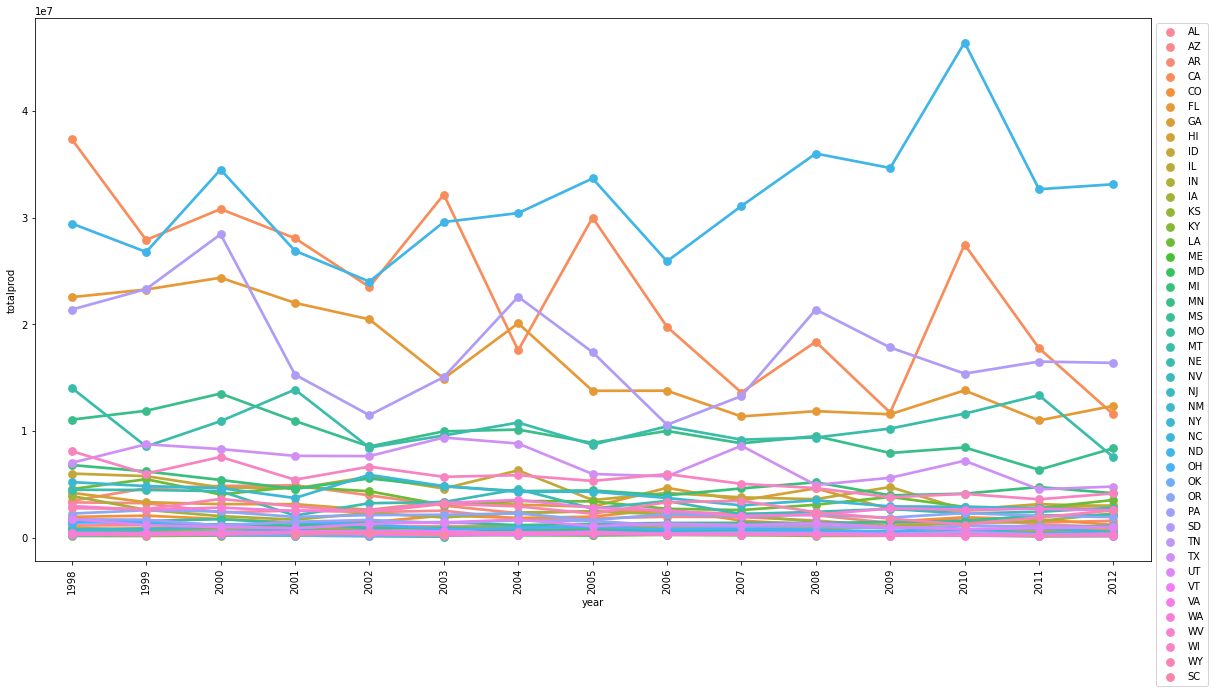

In [20]:
plt.figure(figsize = (20,10))
sns.pointplot(x='year', y='totalprod', data=honey_production, ci=None, estimator=sum ,hue='state')
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation=90) 

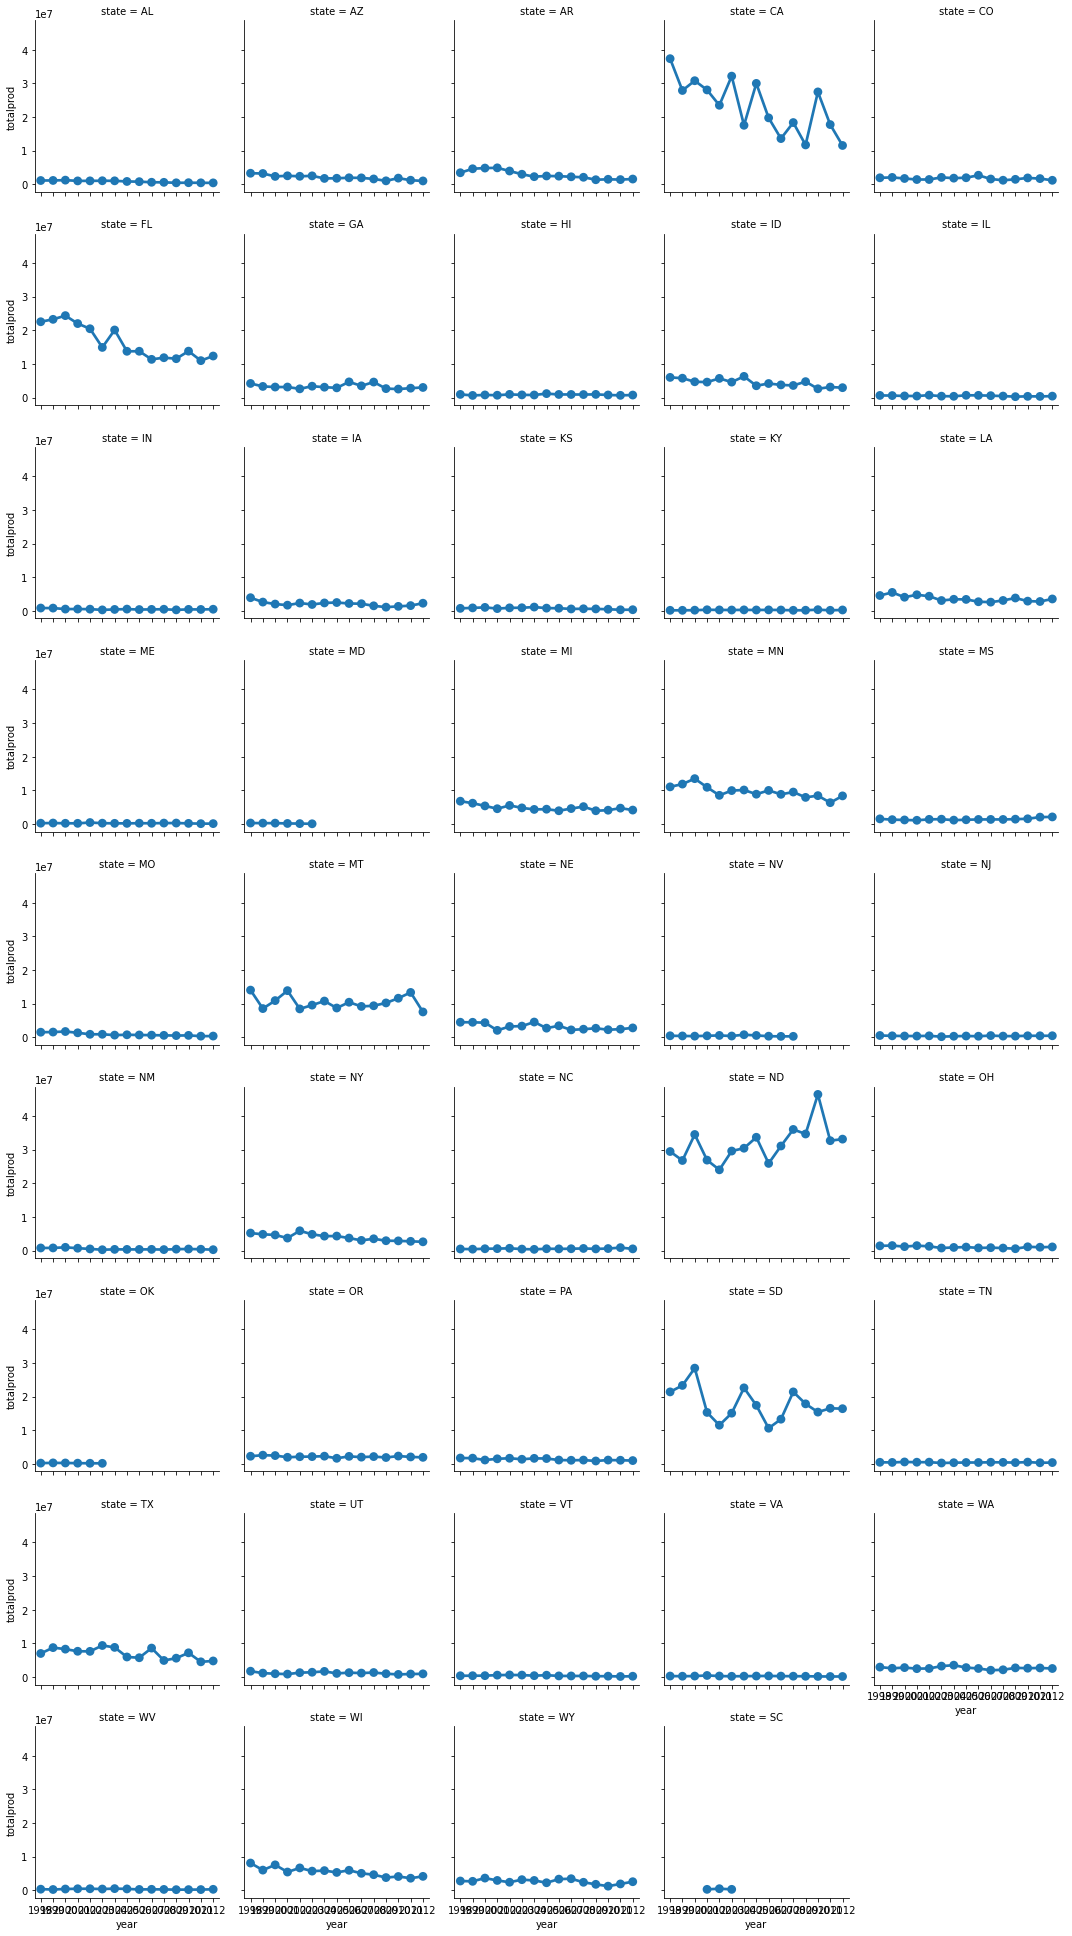

In [21]:
#production trend at state level
sns.catplot(x='year', y='totalprod', data=honey_production , estimator=sum , col='state' , kind="point" , height=3 , col_wrap=5)

Observation for production trend at state level:

ND shows the highest production of honey over all the states.
CA shows the largest variation in honey production trend.
Most prominent honey production states are TX, SD, ND, MT, FL, CA.
MN shows an increase in honey production.

# 7


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '1998'),
  Text(1, 0, '1999'),
  Text(2, 0, '2000'),
  Text(3, 0, '2001'),
  Text(4, 0, '2002'),
  Text(5, 0, '2003'),
  Text(6, 0, '2004'),
  Text(7, 0, '2005'),
  Text(8, 0, '2006'),
  Text(9, 0, '2007'),
  Text(10, 0, '2008'),
  Text(11, 0, '2009'),
  Text(12, 0, '2010'),
  Text(13, 0, '2011'),
  Text(14, 0, '2012')])

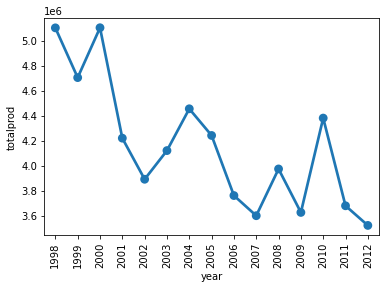

In [22]:
sns.pointplot(x='year', y='totalprod', data=honey_production, ci=None)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '1998'),
  Text(1, 0, '1999'),
  Text(2, 0, '2000'),
  Text(3, 0, '2001'),
  Text(4, 0, '2002'),
  Text(5, 0, '2003'),
  Text(6, 0, '2004'),
  Text(7, 0, '2005'),
  Text(8, 0, '2006'),
  Text(9, 0, '2007'),
  Text(10, 0, '2008'),
  Text(11, 0, '2009'),
  Text(12, 0, '2010'),
  Text(13, 0, '2011'),
  Text(14, 0, '2012')])

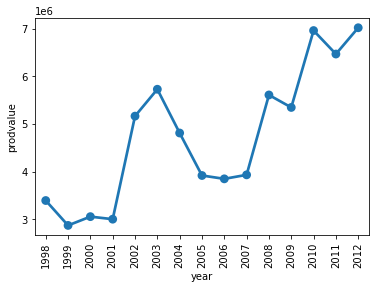

In [23]:
sns.pointplot(x='year', y='prodvalue' , data=honey_production , ci=None)
plt.xticks(rotation=90)

In [24]:
Observations:

Although the production trend declined over the years, but the value of production has been on an increase.
Despite overall honey production being lowest in the year 2012, the value of production marked that year has been the highest.
Though supply declined, demand added to the increase in value of production over the years.

SyntaxError: invalid syntax (377910575.py, line 1)

# CONCLUSION:-
It can be concluded that the total honey production has declined over the years and the value of production per pound has increased.The reason for the declined honey production is the decrease in the yield per colony over the years.
